<a href="https://colab.research.google.com/github/alex-pakalniskis/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS13_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy import stats  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(stats.chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(stats.normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=38.69323106073592, pvalue=3.961609200867749e-09)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(stats.kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## $\chi^{2}$ Test for 1 categorical variable. (Pearson's $\chi^{2}$ test)

| Roll:     |  1  |  2  |  3  |  4  |  5  |  6  |
|-----------|-----|-----|-----|-----|-----|-----|
| Observed: |  27 | 13  |  10 | 15  | 30  |  32 |
| Expected: |   |   |   |   |   |   |

Null Hypothesis: The distribution of observed frequencies is equal to the distribution of expected frequencies. The die is fair.

Alternative Hypothesis: The distribution of observed frequencies is not equal to the distribution of expected frequencies - they are different. The die is unfair.

In [1]:
import numpy as np


rolls = np.array([27,13,10,15,30,32])

average = rolls.sum()/len(rolls)

# I can't use the middle value to ask questions about an entire distribution
# mean
average

21.166666666666668

An expected frequency is: $\frac{\text{total observations}}{\text{# of categories}}$





___




 $\frac{\text{(observed - expected)}^2}{ \text{expected}}$

In [4]:
observed = rolls
observed

array([27, 13, 10, 15, 30, 32])

In [2]:
# expected frequency of each side of the die
# each side has the same expected frequency with a fair die
expected_frequencies = rolls.sum() / 6

expected_frequencies

21.166666666666668

In [3]:
expected = [expected_frequencies,expected_frequencies,expected_frequencies,expected_frequencies,expected_frequencies,expected_frequencies]

expected

[21.166666666666668,
 21.166666666666668,
 21.166666666666668,
 21.166666666666668,
 21.166666666666668,
 21.166666666666668]

In [6]:
# For my first cell

(27 - 21.166666666666668)**2 / 21.166666666666668

1.6076115485564297

In [7]:
# Numpy is amazing

a = [1,2,3]

b = [4,5,6]

a + b

[1, 2, 3, 4, 5, 6]

In [8]:
# Array broadcasting
# do the math elementwise
# cell by cell

a = np.array(a)
b = np.array(b)

a + b

array([5, 7, 9])

# Use array broadcasting to calculate my $\chi^2$ statistic


In [9]:

chi_squared = ((observed - expected)**2 / expected).sum()

chi_squared

21.67716535433071

In [11]:
pvalue = 0.0006

pvalue

0.0006

How do we go from test statistic to p-value?

Degrees of freedom: number of categories - 1
* for our die rolls: ${DOF} = 6 - 1 = 5$

Confidence level: 95%

**Conclusion**: 

Based on a $\chi^2$ statistic of 21.677 abd a ${pvalue}$ of 0.0006, I reject the null hypothesis that my observed distribution comes from a die with similar frequencies to my expected distributions. The die that is being used is likely to be unfair.

In [13]:
from scipy import stats

stats.chisquare(observed, expected)

Power_divergenceResult(statistic=21.67716535433071, pvalue=0.0006029877129094496)

## $\chi^{2}$ Test for independence (2 variables)

<https://en.wikipedia.org/wiki/Chi-squared_test>

**Null hypothesis**: Two variables are independent

**Alternative hypothesis**: Two variables are dependent

**Confidence level**: $95\%$

In [14]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv")

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
df.describe(exclude="number")

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [16]:
cut_points = [0,9,19,29,39,49,1000]

label_names = ["0-9","10-19", "20-29","30-39","40-49","50+"]


df["hours_per_week_categories"] = pd.cut(df["hours-per-week"], cut_points, label_names)

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,"(39, 49]"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,"(9, 19]"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"(39, 49]"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,"(39, 49]"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,"(39, 49]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,"(29, 39]"
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,"(39, 49]"
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,"(39, 49]"
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,"(19, 29]"


In [17]:
contingency_table = pd.crosstab(df["sex"], df["hours_per_week_categories"], margins=True)

contingency_table

hours_per_week_categories,"(0, 9]","(9, 19]","(19, 29]","(29, 39]","(39, 49]","(49, 1000]",All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


## Expected Value Calc



In [0]:
row_sums = contingency_table.iloc[0:2,6].values

col_sums = contingency_table.iloc[2,0:6].values

In [0]:
total_total = df.shape[0]

In [20]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [0]:
# Get a crosstab without the margins:

observed = pd.crosstab(df["sex"], df["hours_per_week_categories"]).values

In [22]:
chi_squared = ((observed - expected)**2 / expected).sum()

print(chi_squared)

2287.190943926107


In a $\chi^2$ test for independence, Degrees of Freedom is calculated slightly differently:

$\frac{\text{(# rows of my contingency table - 1)}}{\text{(# columns of my contingency table - 1)}}$

or

$\frac{\text{(# of categories of variable_1 - 1)}}{\text{(# of categories of variable_2 - 1)}}$


DOF: (2-1)*(6-1) = (1*5) = 5

In [25]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

print("chi2_stat:", chi2_stat)

print("p_value:",p_value)

print("dof:",dof)

print("expected:",expected)

chi2_stat: 2287.190943926107
p_value: 0.0
dof: 5
expected: [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


## Central Limit Theorem



In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.75, 0.4166666666666667, 0.4166666666666667, 0.75, 0.5833333333333334, 0.75, 0.5, 0.16666666666666666, 0.4166666666666667, 0.3333333333333333, 0.3333333333333333, 0.5833333333333334, 0.5833333333333334, 0.5, 0.4166666666666667, 0.8333333333333334, 0.6666666666666666, 0.4166666666666667, 0.25, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.3333333333333333, 0.25, 0.16666666666666666, 0.4166666666666667, 0.3333333333333333, 0.5, 0.4166666666666667, 0.5833333333333334, 0.4166666666666667, 0.5833333333333334, 0.6666666666666666, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.3333333333333333, 0.4166666666666667, 0.3333333333333333, 0.5833333333333334, 0.5, 0.3333333333333333, 0.5, 0.4166666666666667, 0.75, 0.4166666666666667, 0.3333333333333333, 0.5833333333333334, 0.5833333333333334, 0.5, 0.16666666666666666, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.666

In [27]:
df = pd.DataFrame({'single_sample': one_sample})
df.head()

,single_sample
0,1
1,0
2,0
3,1
4,1


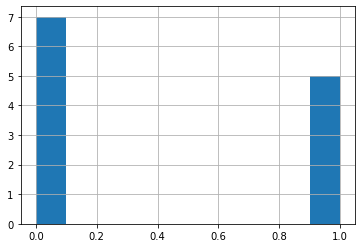

In [28]:
df.single_sample.hist();

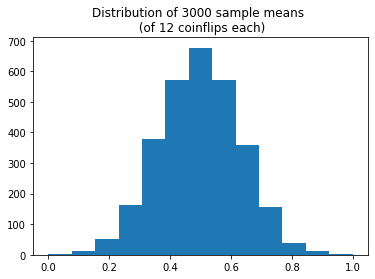

In [30]:
ax = plt.hist(sample_means, bins=13)
plt.title('Distribution of 3000 sample means \n (of 12 coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [31]:
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=20)
  coinflips_large = np.random.binomial(n=1, p=.5, size=100)
  one_small_sample = coinflips_small
  one_small_large = coinflips_large
  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())

print(len(sample_means_small))
print(sample_means_small)

3000
[0.45, 0.55, 0.5, 0.6, 0.7, 0.35, 0.4, 0.6, 0.6, 0.6, 0.35, 0.45, 0.6, 0.35, 0.25, 0.6, 0.3, 0.5, 0.75, 0.35, 0.5, 0.55, 0.55, 0.55, 0.5, 0.55, 0.45, 0.4, 0.5, 0.6, 0.6, 0.55, 0.55, 0.4, 0.2, 0.6, 0.75, 0.5, 0.45, 0.4, 0.55, 0.65, 0.35, 0.45, 0.6, 0.35, 0.55, 0.5, 0.6, 0.65, 0.45, 0.5, 0.3, 0.45, 0.3, 0.6, 0.65, 0.5, 0.5, 0.5, 0.5, 0.4, 0.6, 0.45, 0.45, 0.55, 0.5, 0.4, 0.35, 0.45, 0.4, 0.6, 0.25, 0.5, 0.7, 0.55, 0.5, 0.45, 0.5, 0.5, 0.55, 0.4, 0.7, 0.6, 0.45, 0.7, 0.35, 0.6, 0.6, 0.6, 0.55, 0.65, 0.45, 0.55, 0.4, 0.65, 0.5, 0.7, 0.6, 0.45, 0.45, 0.45, 0.6, 0.7, 0.45, 0.45, 0.55, 0.45, 0.35, 0.6, 0.6, 0.4, 0.6, 0.5, 0.45, 0.3, 0.45, 0.3, 0.5, 0.5, 0.5, 0.4, 0.6, 0.5, 0.5, 0.4, 0.45, 0.55, 0.6, 0.4, 0.4, 0.55, 0.5, 0.6, 0.5, 0.6, 0.3, 0.55, 0.6, 0.65, 0.4, 0.6, 0.45, 0.45, 0.35, 0.4, 0.3, 0.35, 0.5, 0.45, 0.35, 0.6, 0.5, 0.45, 0.5, 0.4, 0.45, 0.25, 0.65, 0.45, 0.5, 0.6, 0.6, 0.4, 0.5, 0.45, 0.35, 0.4, 0.6, 0.45, 0.6, 0.55, 0.5, 0.65, 0.7, 0.5, 0.75, 0.55, 0.45, 0.3, 0.4, 0.6, 0.4, 0

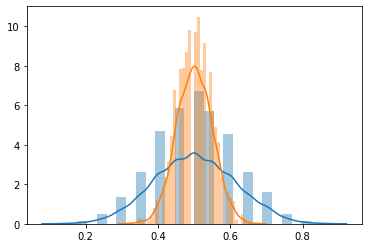

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)

The standard error describes how precisely I'm estimating this population parameter with this sample statistic. 

## Standard Error of the Mean

What does it mean to "estimate" the Population mean?

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
def mean_moe(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    sample - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy arrays are your friend
  sample = np.array(sample)
  # What is my estimate -- the mean
  mean = np.mean(sample)
  # Sample size
  n = len(sample)
  # Standard error
  #stderr = stats.sem(sample)
  # I want sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n-1)
  # Margin of error 
  margin_of_error = t * stderr
  return mean, margin_of_error

def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    sample - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy arrays are your friend
  sample = np.array(sample)
  # What is my estimate -- the mean
  mean = np.mean(sample)
  # Sample size
  n = len(sample)
  # Standard error
  #stderr = stats.sem(sample)
  # I want sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n-1)
  # Margin of error 
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error
  

In [0]:
coinflips = np.random.binomial(n=1, p=.5, size=200)

In [59]:
mean_moe(coinflips)

(0.465, 0.06972269562117082)

In [60]:
confidence_interval(coinflips)

(0.3952773043788292, 0.465, 0.5347226956211708)

## Graphically Represent a Confidence Interval

In [61]:
df = pd.DataFrame({"coinflips":coinflips})

df.head()

,coinflips
0,1
1,0
2,1
3,1
4,0


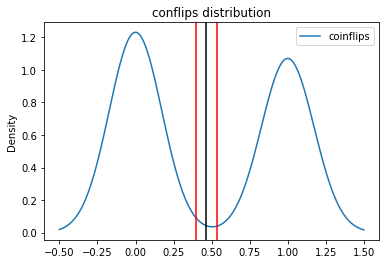

In [62]:
CI = confidence_interval(coinflips)

df.plot.density()
plt.title("conflips distribution")

plt.axvline(x=CI[0], color="red")
plt.axvline(x=CI[1], color="black")
plt.axvline(x=CI[2], color="red")

plt.show()

## Other way to plot confidence intervals:

* matplotlib errorbars - requires a mean and a margin of error
* bar charts with error bars (plt.bar: xerr, yerr)
* seaborn regression plot (regplot)

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [0]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.7333333333333333, 0.43333333333333335, 0.5, 0.43333333333333335, 0.5, 0.5, 0.5333333333333333, 0.5, 0.4, 0.43333333333333335, 0.3333333333333333, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.5, 0.6, 0.6333333333333333, 0.5, 0.3333333333333333, 0.43333333333333335, 0.4666666666666667, 0.43333333333333335, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.7, 0.7, 0.5333333333333333, 0.5, 0.6666666666666666, 0.43333333333333335, 0.43333333333333335, 0.4, 0.5666666666666667, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.36666666666666664, 0.4666666666666667, 0.4, 0.6333333333333333, 0.5666666666666667, 0.5666666666666667, 0.7333333333333333, 0.4, 0.4666666666666667, 0.6, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.5, 0.36666666666666664, 0.4, 0.5666666666666667, 0.5, 0.36666666666666664, 0.5666666666666667, 0.7, 0.43333333333333335, 0.36666666666666664, 0.56666666

In [0]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.48189276007256693, 0.5181072399274331)


In [0]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.48189276007256693, 0.5181072399274331)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=1.0958141381351718, pvalue=0.2758187277462794)

A null hypothesis that's just outside of our confidence interval == reject



In [0]:
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=1.9842235343454973, pvalue=0.04999925456754134)